# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from prettytable import PrettyTable

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [7]:
df['flag_doente'] = pd.to_numeric(df['flag_doente'], errors='coerce')
value_counts = df['flag_doente'].value_counts()
doentes = value_counts.get(1)
saudaveis = value_counts.get(0)
total = len(df)
if saudaveis != 0:
    media_doentes = doentes / total # type: ignore
    odds = doentes / saudaveis # type: ignore
    odds_ratio = odds / (1 - odds)
    logito, woe = np.log(odds), np.log(odds_ratio)
else:
    media_doentes, odds, odds_ratio, logito, woe = np.nan, np.nan, np.nan, np.nan, np.nan
table = PrettyTable()
table.field_names = ["Estatística", "Valor"]
table.add_row(["Número de saudáveis", saudaveis])
table.add_row(["Número de doentes", doentes])
table.add_row(["Total", total])
table.add_row(["Quantidade média de doentes", f"{media_doentes:.2%}"])
table.add_row(["Odds", f"{odds:.4f}"])
table.add_row(["Odds ratio", f"{odds_ratio:.4f}"])
table.add_row(["Logito", f"{logito:.4f}"])
table.add_row(["Weight of Evidence (WOE)", f"{woe:.4f}"])
print(table)

+-----------------------------+---------+
|         Estatística         |  Valor  |
+-----------------------------+---------+
|     Número de saudáveis     |   164   |
|      Número de doentes      |   139   |
|            Total            |   303   |
| Quantidade média de doentes |  45.87% |
|             Odds            |  0.8476 |
|          Odds ratio         |  5.5600 |
|            Logito           | -0.1654 |
|   Weight of Evidence (WOE)  |  1.7156 |
+-----------------------------+---------+


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [8]:
df['age_group'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 70, 80], labels=['30-39', '40-49', '50-59', '60-69', '70-79'])
bivariada_age = df.groupby('age_group', observed=False)['flag_doente'].agg(['count', 'sum', 'mean', 'min', 'max', 'mean'])
table = PrettyTable()
table.field_names = ["Faixa Etária", "Contagem", "Soma", "Média", "Mínimo", "Máximo"]
for index, row in bivariada_age.iterrows():
    table.add_row([index, *row[:-1]])
print(table)

+--------------+----------+------+---------------------+--------+--------+
| Faixa Etária | Contagem | Soma |        Média        | Mínimo | Máximo |
+--------------+----------+------+---------------------+--------+--------+
|    30-39     |   17.0   | 6.0  | 0.35294117647058826 |  0.0   |  1.0   |
|    40-49     |   76.0   | 23.0 |  0.3026315789473684 |  0.0   |  1.0   |
|    50-59     |  130.0   | 66.0 |  0.5076923076923077 |  0.0   |  1.0   |
|    60-69     |   73.0   | 43.0 |  0.589041095890411  |  0.0   |  1.0   |
|    70-79     |   6.0    | 1.0  | 0.16666666666666666 |  0.0   |  1.0   |
+--------------+----------+------+---------------------+--------+--------+


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

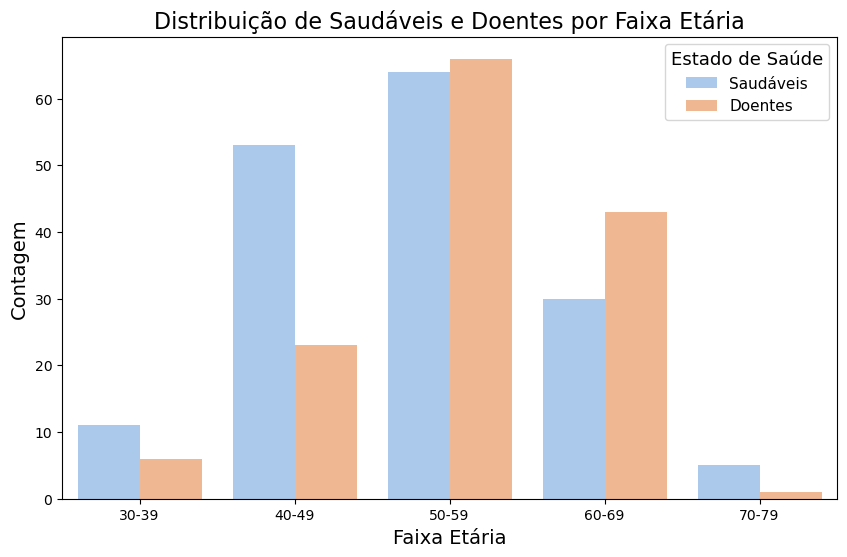

In [9]:
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='age_group', hue='flag_doente', data=df)
ax.set_ylabel('Contagem', fontsize=14)
ax.set_xlabel('Faixa Etária', fontsize=14)
ax.set_title('Distribuição de Saudáveis e Doentes por Faixa Etária', fontsize=16)
legend_labels = {0: 'Saudáveis', 1: 'Doentes'}
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[int(label.get_text())] for label in ax.get_legend().get_texts()],
          title='Estado de Saúde', title_fontsize='13', fontsize='11', loc='upper right')
plt.show()